<h1>Data preprocessing</h1>

- The images in train folder are divided into a training set and a validation set.
- The images both in training set and validation set are separately divided into two folders -- cat and dog according to their lables.

(the two steps above were finished in Preprocessing train dataset.ipynb)

- The RGB color values of the images are rescaled to 0~1.
- The size of the images are resized to 224*224.

In [1]:
##### Variable Definition Stage ####

#Imports
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Image Size
image_width = 224
image_height = 224
image_size = (image_width, image_height)

#Directories
train_data_dir = 'v_data\\train'
test_data_dir = 'dataset'
validation_data_dir = 'v_data\\validation'

#Sample Settings
nb_train_samples = 300
nb_validation_samples = 100
batch_size = 16

#NN Settings
epochs = 10

In [2]:
#### Dataset Preprocessing Stage ####

# Training Data Batch Generation
train_datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.25)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,  # this is the target directory
        target_size=image_size,  # all images will be resized to 224x224
        batch_size=batch_size,
        class_mode='binary',
        subset='training') 

# Validation Data Batch Generation
validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = train_datagen.flow_from_directory(
        train_data_dir,  # this is the target directory
        target_size=image_size,  # all images will be resized to 224x224
        batch_size=batch_size,
        class_mode='binary',
        subset='validation')

# Testing Data Batch Generation
'''
The test data generation step uses a single class 'test' to load all unlabeled images.
:Batch Size: 1 as each image should be sampled once.
'''

test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(
        validation_data_dir,  # this is the target directory
        target_size=image_size,  # all images will be resized to 224x224
        batch_size=1,
        class_mode='binary')

Found 300 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


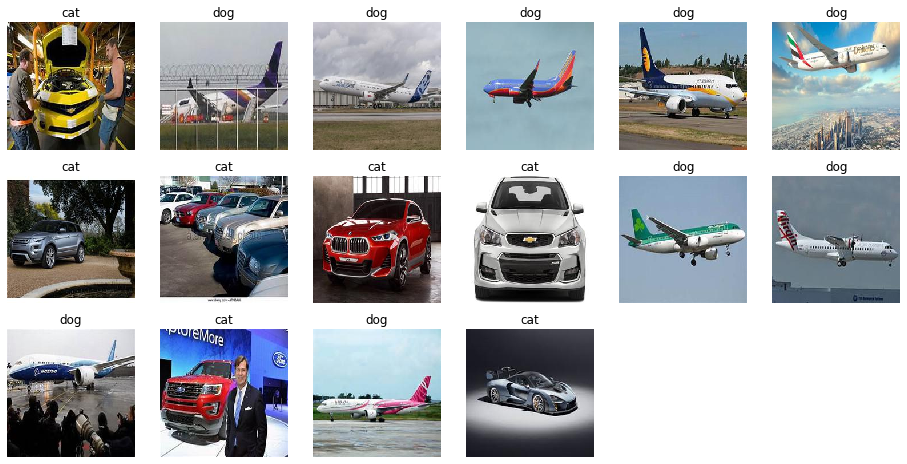

In [3]:
#### Debug Display Random Sample of Dataset Images ####

#Imports
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

x, y = train_generator.next()

plt.figure(figsize=(16, 8))
for i, (img, label) in enumerate(zip(x, y)):
    plt.subplot(3, 6, i+1)
    if label == 1:
        plt.title('dog')
    else:
        plt.title('cat')
    plt.axis('off')
    plt.imshow(img, interpolation="nearest")

In [ ]:
import tensorflow as tf

#with tf.device('/cpu:0'):
#tf.debugging.set_log_device_placement(True)

# Create some tensors
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)

print(c)

In [ ]:
#### Baudouin Simple Mode ####

# Imports
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense 
from tensorflow.keras import backend as K 


# Model Definition
if K.image_data_format() == 'channels_first': 
	input_shape = (3, image_width, image_height) 
else: 
	input_shape = (image_width, image_height, 3) 

model = Sequential() 
model.add(Conv2D(32, (2, 2), input_shape = input_shape)) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 

model.add(Conv2D(32, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 

model.add(Conv2D(64, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 

model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(1)) 
model.add(Activation('sigmoid')) 

# Model Compilation
model.compile(loss ='binary_crossentropy', 
				optimizer ='rmsprop', 
				metrics =['accuracy']) 


In [25]:
# Imports
import tensorflow as tf
import os
import h5py
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential 
import tensorflow.keras.layers as layers
from tensorflow.keras import backend as K 
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard

for i in range(10):
    # Checkpoint for saving the best state
    best_model = ModelCheckpoint(filepath="InceptionResNetV2_best_" + str(i) + ".hdf5", monitor='val_loss', verbose=0, save_best_only=True, mode="auto")

    model = Sequential()
    model.add(keras.applications.InceptionResNetV2(include_top=False, pooling="max", weights=None))
    model.add(layers.Dense(1, activation='sigmoid'))
    # ResNet-50 model is already trained, should not be trained
    model.layers[0].trainable = True

    model.summary()
            
    model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

    # Run training on GPU
    with tf.device('/gpu:0'):
        model.fit(train_generator, 
            steps_per_epoch = nb_train_samples // batch_size, 
            epochs = epochs, validation_data=validation_generator, validation_steps = validation_generator.samples // batch_size,
            callbacks=[best_model], verbose=1, shuffle=True)

0,544
_________________________________________________________________
Epoch 1/10
18/18 [==============================] - 31s 626ms/step - loss: 3.1442 - accuracy: 0.6199 - val_loss: 1.1271 - val_accuracy: 0.4896
Epoch 2/10
18/18 [==============================] - 6s 331ms/step - loss: 1.2646 - accuracy: 0.8292 - val_loss: 2.2653 - val_accuracy: 0.4896
Epoch 3/10
18/18 [==============================] - 6s 330ms/step - loss: 0.8809 - accuracy: 0.7981 - val_loss: 2.9505 - val_accuracy: 0.5208
Epoch 4/10
18/18 [==============================] - 6s 348ms/step - loss: 1.2736 - accuracy: 0.7678 - val_loss: 4.1275 - val_accuracy: 0.5104
Epoch 5/10
18/18 [==============================] - 6s 360ms/step - loss: 0.3290 - accuracy: 0.8940 - val_loss: 7.0144 - val_accuracy: 0.5000
Epoch 6/10
18/18 [==============================] - 7s 376ms/step - loss: 1.2422 - accuracy: 0.7978 - val_loss: 6.2100 - val_accuracy: 0.5104
Epoch 7/10
18/18 [==============================] - 6s 351ms/step - loss: 0

In [11]:
# Run training on GPU
with tf.device('/gpu:0'):
	model.fit(train_generator, 
		steps_per_epoch = nb_train_samples // batch_size, 
		epochs = epochs, validation_data=validation_generator, validation_steps = validation_generator.samples // batch_size,
		callbacks=[best_model], verbose=1, shuffle=True)

Epoch 1/10
18/18 [==============================] - 26s 594ms/step - loss: 3.3750 - accuracy: 0.6692 - val_loss: 11401.9346 - val_accuracy: 0.5104

Epoch 00001: val_loss improved from inf to 11401.93457, saving model to resnet_152V2_best_3.hdf5
Epoch 2/10
18/18 [==============================] - 8s 429ms/step - loss: 4.1918 - accuracy: 0.6042 - val_loss: 4595.8311 - val_accuracy: 0.4896

Epoch 00002: val_loss improved from 11401.93457 to 4595.83105, saving model to resnet_152V2_best_3.hdf5
Epoch 3/10
18/18 [==============================] - 8s 434ms/step - loss: 3.6444 - accuracy: 0.6140 - val_loss: 52.7171 - val_accuracy: 0.5729

Epoch 00003: val_loss improved from 4595.83105 to 52.71707, saving model to resnet_152V2_best_3.hdf5
Epoch 4/10
18/18 [==============================] - 8s 432ms/step - loss: 1.6203 - accuracy: 0.7507 - val_loss: 877.3780 - val_accuracy: 0.4792

Epoch 00004: val_loss did not improve from 52.71707
Epoch 5/10
18/18 [==============================] - 8s 434ms/st

pred:  [[1.]]
[0]


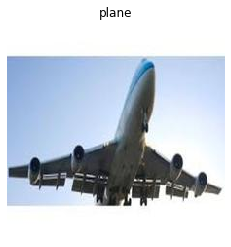

In [46]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Input
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.models import model_from_json
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD
import random
import os
import cv2
import logging


import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

'''
tf.get_logger().setLevel(3)
tf.autograph.set_verbosity(1)

correct = 0
incorrect = 0

for i in range(0, 400):
    x, y = test_generator.next()
    pred = model.predict_on_batch(x)
    #print('pred: ', pred)
    pred_class = np.argmax(pred, axis=1)
    #print(pred_class)
    if pred[pred_class[0]] >= 0.5:
        if y == 1:
            correct = correct + 1
            for i, (img, label) in enumerate(zip(x, y)):
                #plt.subplot(3, 6, i+1)
                if pred[pred_class[0]] >= 0.5:
                    plt.title('plane')
                else:
                    plt.title('car')
                plt.axis('off')
                plt.imshow(img, interpolation="nearest")
        else:
            incorrect = incorrect + 1

            
    else:
        if y == 0:
            correct = correct + 1
            for i, (img, label) in enumerate(zip(x, y)):
                #plt.subplot(3, 6, i+1)
                if pred[pred_class[0]] >= 0.5:
                    plt.title('plane')
                else:
                    plt.title('car')
                plt.axis('off')
                plt.imshow(img, interpolation="nearest")
        else:
            incorrect = incorrect + 1


print(correct)
print(incorrect)'''

'''
x, y = test_generator.next()
pred = model.predict_on_batch(x)
print('pred: ', pred)
pred_class = np.argmax(pred, axis=1)
print(pred_class)

for i, (img, label) in enumerate(zip(x, y)):
    #plt.subplot(3, 6, i+1)
    if pred[pred_class[0]] >= 0.5:
        plt.title('plane')
    else:
        plt.title('car')
    plt.axis('off')
    plt.imshow(img, interpolation="nearest")
'''

#model.evaluate(test_generator)